Kształt danych wejściowych: (1000, 2)
Kształt targetów: (1000, 1)


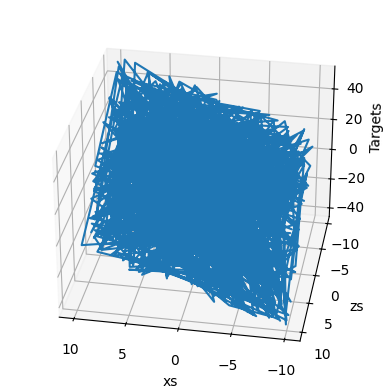

Początkowe wagi i biasy: [[-0.04751   ]
 [ 0.00713393]] [0.09426254]
Epoka 1, strata: 228.38575203608343
Epoka 2, strata: 37.61226755290344
Epoka 3, strata: 14.47614705836539
Epoka 4, strata: 11.316830985034814
Epoka 5, strata: 10.563503541706316
Epoka 6, strata: 10.114292008845899
Epoka 7, strata: 9.716010635608106
Epoka 8, strata: 9.337523959224534
Epoka 9, strata: 8.974515673045138
Epoka 10, strata: 8.625942414746014
Epoka 11, strata: 8.291179896673992
Epoka 12, strata: 7.969674749535905
Epoka 13, strata: 7.660901189159848
Epoka 14, strata: 7.3643549511739055
Epoka 15, strata: 7.0795518263004285
Epoka 16, strata: 6.8060267904745935
Epoka 17, strata: 6.543333235730575
Epoka 18, strata: 6.291042239764136
Epoka 19, strata: 6.048741865442001
Epoka 20, strata: 5.816036488177789
Epoka 21, strata: 5.59254614995942
Epoka 22, strata: 5.3779059389588255
Epoka 23, strata: 5.171765393709111
Epoka 24, strata: 4.973787930876046
Epoka 25, strata: 4.783650295689644
Epoka 26, strata: 4.6010420341383

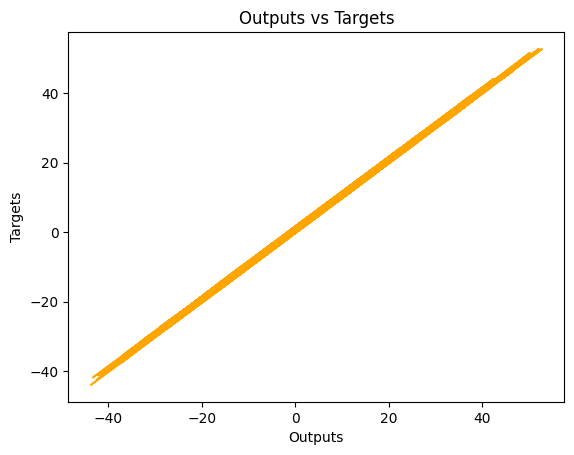

In [5]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))
inputs = np.column_stack((xs, zs))
print("Kształt danych wejściowych:", inputs.shape)


noise = np.random.uniform(low=-1, high=1, size=(observations, 1))
targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_dataset', inputs=inputs, targets=targets)
print("Kształt targetów:", targets.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()


init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print("Początkowe wagi i biasy:", weights, biases)


eta = 0.02
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / (2 * observations)
    print(f"Epoka {i+1}, strata: {loss}")

    deltas_scaled = deltas / observations
    weights -= eta * np.dot(inputs.T, deltas_scaled)
    biases -= eta * np.sum(deltas_scaled)


print("Wytrenowane wagi i biasy:", weights, biases)


plt.plot(outputs, targets, color='orange')
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.title('Outputs vs Targets')
plt.show()
